# c++核心编程

## 内存分区模型
c++程序在执行时，将内存大方向划分为四个区域
1. 代码区：存放函数体的二进制代码，由操作系统进行管理（程序运行前）
2. 全局区：存放*全局变量*和*静态变量*以及*常量*（程序运行前）
3. 栈区： 由编译器自动分配释放、存放函数的参数值，局部变量等（程序运行后）
4. 堆区： 由程序员分配、释放，若程序员不释放，程序结束时由操作系统回收（程序运行后）

>意义：不同区域存放的数据，赋予不同的生命周期，给我们更灵活的编程 

## 代码区
存放CPU执行的机器指令
1. 代码区是**共享的**，共享的目的是对于频繁被执行的程序，只需要在内存中有一份代码即可
2. 代码区是**只读的**，防止程序意外地修改了相关指令

## 全局区
全局区包含以下变量或常量：
* 全局变量
* 静态变量
* 常量区(`const`修饰的全局变量)
* 字符串常量
* 其他常量
这个区域的数据在程序结束后由操作系统释放

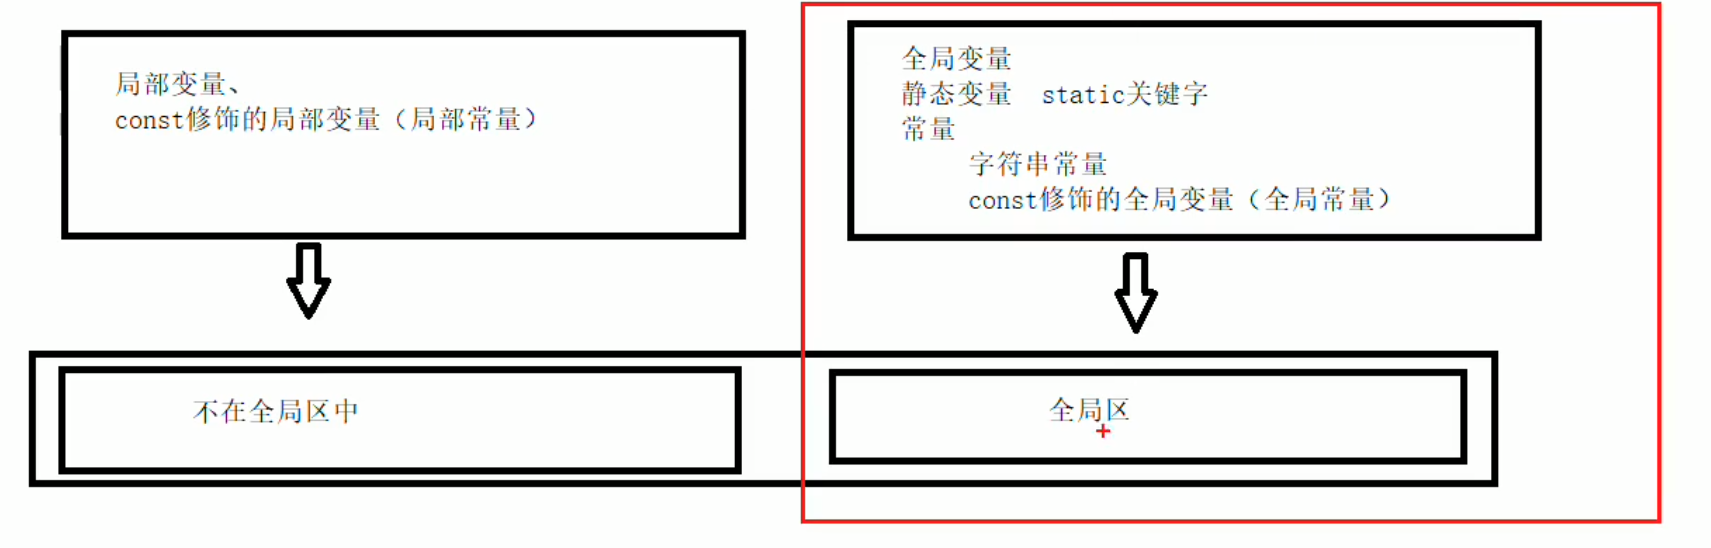

### 静态变量
在普通变量前面添加关键字`static`，得到静态变量
```cpp
static 数据类型 数据名称 = 数据初始值;
```

### 常量
常量具有两种类型
1. 字符串常量
2. `const`关键字修饰的变量
    * `const`修饰的全局变量
    * `const`修饰的局部变量

In [20]:
//全局区变量示例
#include<iostream>
#include<string>

using namespace std;

//创建全局变量
//存放在全局区
int g_a = 10;
//const修饰的全局变量
int c_g_a = 10;

In [21]:
//创建普通局部变量
//栈区： 由编译器自动分配释放、存放函数的参数值，局部变量等
int main(){
    //创建局部变量
    int a = 10;
    //创建静态变量
   static int s_a = 10;
    
    //字符串常量
    cout<<"字符串常量的地址为: "<<&"hello world";
    cout<<endl;
    //const修饰的局部变量
    const int c_a = 10;
    
    cout<<"局部变量a的地址为:"<<&a;
    cout<<endl;
    cout<<"全局变量g_a的地址为:"<<&g_a;
    cout<<endl;
    cout<<"静态变量s_a的地址为："<<&s_a;
    cout<<endl;
    cout<<"const修饰的局部常量c_a的地址为："<<&c_a;
    cout<<endl;
    cout<<"const修饰的全局变量c_g_a的地址为："<<&c_g_a;
}
main()

字符串常量的地址为: 0x7fec6824201e
局部变量a的地址为:0x7ffd40025f8c
全局变量g_a的地址为:0x7fec6f53804c
静态变量s_a的地址为：0x7fec6f538048
const修饰的局部常量c_a的地址为：0x7ffd40025f88
const修饰的全局变量c_g_a的地址为：0x7fec6f538050

0

## 栈区
由编译器自动分配释放，存放函数的参数值(`形参`)、局部变量等

**注意事项：**`不要返回局部变量的地址，栈区开辟的数据由编译器自动释放`

In [22]:
//栈区数据的注意事项
#include<iostream>

using namespace std;

In [25]:
//通过定义一个函数来验证栈区数据的释放
//报错，无法进行次定义
int* func(){
    int a = 10;
    
    return &a; //将局部变量a的地址作为返回值返回
}
    

input_line_53:6:13: warning: address of stack memory associated with local variable 'a' returned
      [-Wreturn-stack-address]
    return &a; //将局部变量a的地址作为返回值返回
            ^


## 堆区
由程序员分配释放，若程序员不释放，则在程序结束时由操作系统回收

在c++中，主要利用`new`关键字在堆区开辟内存。并且通过一个指针去接收堆区开辟的内存地址

In [27]:
//在堆区开辟数据
#include<iostream>

using namespace std;

In [33]:
//在堆区开辟数据
//利用关键字new在堆区开辟内存
int* func(){
    //int型指针本质上也是局部变量，放在栈区，指针保存的数据是放在堆区
    int *p = new int(10);//利用一个int型指针，接收通过关键字new开辟的堆区内存
    
    return p;
}

In [32]:
int main(){
    //在堆区开辟数据
    int *p = func();
    
    cout<<*p;
}
main()

10

0

### new操作符
c++中`new`操作符在堆区上开辟数据。并且通过`delete`关键字释放开辟的堆区内存
```cpp
数据类型* 指针名 = new 数据类型
delete[] 指针名字 //释放堆区数组内存
```


In [6]:
//new操作符示例
#include<iostream>

using namespace std;

In [7]:
//new的基本语法
int* func(){
    //在堆区创建整型数据
    //new返回该数据类型的指针
    int* p = new int(10);
    
    return p;
}

In [8]:
void newTest01(){
    
    int *p = func();
    
    cout<<*p<<endl;
    
    delete p;
    
    cout<<*p<<endl;//堆区内存已经通过delete释放
}

In [9]:
int main(){
    
    newTest01();
}
main();

10
-1580732096


In [10]:
//在堆区利用new开辟数组
void newTest02(){
    //通过new关键字在堆区开辟一个数组，返回数组的首地址。需要通过指针来接收。
    int* arr = new int[10];//10表示有10个元素
    
    for(int i = 0; i < 10; i++){
        arr[i] = i;
        cout<<arr[i]<<" ";
    }
    
    delete[] arr;//通过delete关键字释放相关的内存,[]表示要释放的是一块连续的堆区内存
}
newTest02();



0 1 2 3 4 5 6 7 8 9 